# 【補足】確率的勾配降下法  

`y = ax + b` フィッティング：a, b の値を算出  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.colors
import matplotlib.animation
from IPython.display import HTML
import japanize_matplotlib

In [2]:
max_epochs = 100
eta0 = 0.082
eps = 1e-4


---

$\hat{y}$ = ax + b をベクトルで表す  

$$
\begin{align}
\pmb{x} = \begin{pmatrix}
1 \\ x
\end{pmatrix},
\pmb{w} = \begin{pmatrix}
b \\ a
\end{pmatrix}
\end{align}
$$


\begin{align}
\hat{y} = \pmb{x}^\top\pmb{w}
\end{align}



\begin{align}
\hat{y} = b + xa = ax + b
\end{align}


In [3]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])


---

- $\pmb{X}$ を定義  


In [4]:
X = np.vstack([ np.ones_like(D[:,0]), D[:,0] ]).T
X

array([[1, 1],
       [1, 3],
       [1, 6],
       [1, 8]])

- yを定義  

In [5]:
Y = D[:,1]
Y

array([3, 6, 5, 7])

- w (b, a) の初期値：(0, 0)  

$$
\pmb{w} = \begin{pmatrix}
b \\ a
\end{pmatrix}
$$

In [6]:
W = np.zeros(X.shape[1])
W

array([0., 0.])


---

## 繰り返し(1回目)  


t回目の反復（ただし、初回を$0$回目と数える）における学習率を$\eta_t = \frac{0.03}{\sqrt{t+1}}$とする

In [7]:
t=0
eta = eta0 / np.sqrt(1+t)

- 0から要素数の範囲内で、**ランダム値を算出**  

In [8]:
i = np.random.randint(0, X.shape[0])
i, X[i]

(1, array([1, 3]))

- $\hat{y}$ を定義、**ただし「1要素だけ」**  

\begin{align}
\hat{\pmb{y}}
= \pmb{x}_i^\top \pmb{w}
\end{align}


In [9]:
Y_hat = X[i] @ W
Y_hat

0.0

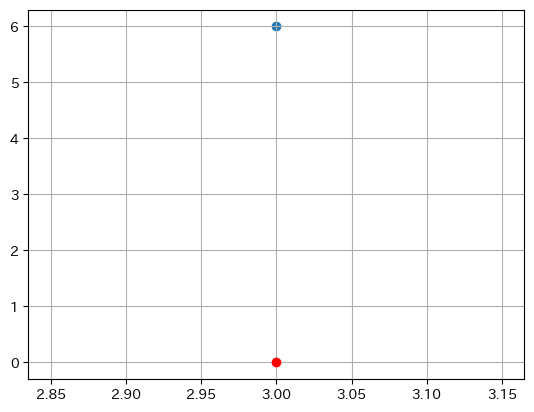

In [10]:
plt.scatter(X[:,1][i], Y[i])
plt.plot(X[:,1][i], Y_hat, 'ro')
plt.grid()

- 目的関数：計算結果が最小値となる$\pmb{w}$を求める  
  → 最終的に0へ近づける  


In [11]:
E = np.abs(Y[i] - Y_hat)**2
E

36.0

- 目的関数を$\pmb{w}$で偏微分  
  現在接している目的関数の傾きを算出  

$$
\begin{align}
\nabla \hat{l}_{\pmb{x}_i, y_i}(\pmb{w}) = \frac{\partial \hat{l}_{\pmb{x}_i, y_i}(\pmb{w})}{\partial \pmb{w}} &= 2 (y_i - \pmb{x}_i^\top \pmb{w}) \pmb{x}_i \cdot (-1)
= 2 (\hat{y}_i - y_i) \pmb{x}_i
\end{align}
$$


In [12]:
grad = 2 * (Y_hat - Y[i]) * X[:,1][i]
grad

-36.0

- $\pmb{w}$を最新化： `w1 = w0 - α∇f(w0)`  


In [13]:
W -= eta * grad
W

array([2.952, 2.952])


---

### 繰り返し(2回目)  


In [14]:
t=1
eta = eta0 / np.sqrt(1+t)

In [15]:
i = np.random.randint(0, X.shape[0])
i, X[i]

(2, array([1, 6]))

In [16]:
Y_hat = X[i] @ W
Y_hat

20.664

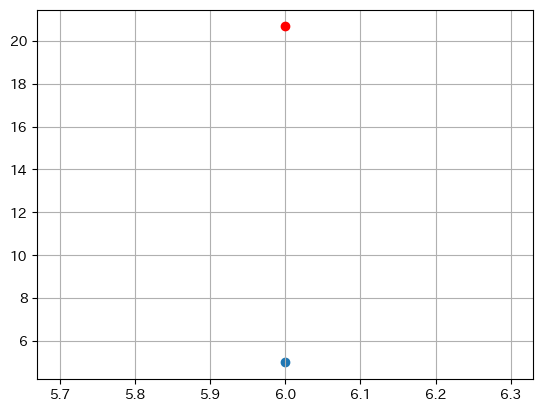

In [17]:
plt.scatter(X[:,1][i], Y[i])
plt.plot(X[:,1][i], Y_hat, 'ro')
plt.grid()

In [18]:
E = np.abs(Y[i] - Y_hat)**2
E

245.36089600000005

In [19]:
grad = 2 * (Y_hat - Y[i]) * X[:,1][i]
grad

187.96800000000002

In [20]:
W -= eta * grad
W

array([-7.94690269, -7.94690269])


---

### 繰り返し(3回目)  


In [21]:
t=2
eta = eta0 / np.sqrt(1+t)

In [22]:
i = np.random.randint(0, X.shape[0])
i, X[i]

(3, array([1, 8]))

In [23]:
Y_hat = X[i] @ W
Y_hat

-71.52212421520186

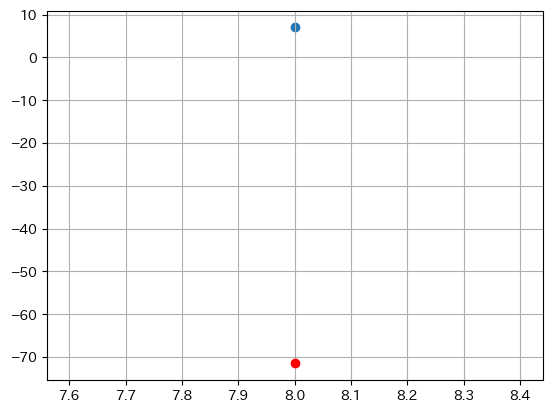

In [24]:
plt.scatter(X[:,1][i], Y[i])
plt.plot(X[:,1][i], Y_hat, 'ro')
plt.grid()

In [25]:
E = np.abs(Y[i] - Y_hat)**2
E

6165.72399126759

In [26]:
grad = 2 * (Y_hat - Y[i]) * X[:,1][i]
grad

-1256.3539874432297

In [27]:
W -= eta * grad
W

array([51.53231496, 51.53231496])


---

## 繰り返し(条件を満たすまで)  

平均二乗残差が目標値： `eps = 1e-4` に達するまで繰り返す  

In [28]:
max_epochs = 40000
eta0 = 0.03
eps = 1e-4

t = 0
W = np.zeros(X.shape[1])

for t in range(max_epochs):
    eta = eta0 / np.sqrt(1+t)
    i = np.random.randint(0, X.shape[0])
    Y_hat = X[i] @ W
    grad = 2 * (Y_hat - Y[i]) * X[i]
    if np.sum(np.abs(grad)) < eps:
        break
    W -= eta * grad

W

array([3.31628499, 0.42145777])


---

## 行列演算で最小値を算出した場合  

目的関数を最小化する、ベクトル$\pmb{w}$の求め方  

$$
\begin{align}
\pmb{w} &= (\pmb{X}^\top \pmb{X})^{-1}\pmb{X}^\top \pmb{y}
\end{align}
$$


- `numpy.linalg.inv()`：逆行列 (行列$^{-1}$)  

In [29]:
w = np.linalg.inv(X.T @ X) @ X.T @ Y
w

array([3.31034483, 0.43103448])


---
